# CS 282
### Programming Assignment 1
#### Item 6

Jan Lendl R. Uy

2019-00312

#### Sytem Specifications
- macOS Sequoia 15.0.1
- Macbook Air M1 (ARM), 8-Core CPU and 8-Core GPU

In [6]:
!pip install -r requirements.txt


[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
def read_image(image_path):
    """Read image in grayscale"""
    return cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [3]:
def display_all_steps(original, blurred, mask, enhanced, title="Unsharp Masking Steps"):
    """Display all steps of unsharp masking process"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(title, fontsize=16)
    
    # Original image
    axes[0,0].imshow(original, cmap='gray')
    axes[0,0].set_title('Original Image')
    axes[0,0].axis('off')
    
    # Blurred image
    axes[0,1].imshow(blurred, cmap='gray')
    axes[0,1].set_title('Blurred Image')
    axes[0,1].axis('off')
    
    # Mask
    axes[1,0].imshow(mask, cmap='gray')
    axes[1,0].set_title('Mask (Original - Blurred)')
    axes[1,0].axis('off')
    
    # Enhanced image
    axes[1,1].imshow(enhanced, cmap='gray')
    axes[1,1].set_title('Enhanced Image')
    axes[1,1].axis('off')
    
    plt.tight_layout()
    plt.show()

In [4]:
def unsharp_masking(image, kernel_size=(5,5), sigma=2.0, amount=1.5):
    """
    Apply unsharp masking to the image
    
    Parameters:
    - image: input image
    - kernel_size: size of Gaussian blur kernel
    - sigma: standard deviation for Gaussian blur
    - amount: weight of the mask to add back
    
    Returns:
    - enhanced image
    - intermediate results (blurred, mask)
    """
    # Step 1: Create blurred version of the image
    blurred = cv2.GaussianBlur(image, kernel_size, sigma)
    
    # Step 2: Create the mask by subtracting blurred from original
    mask = cv2.subtract(image, blurred)
    
    # Step 3: Add weighted mask back to original
    enhanced = cv2.addWeighted(image, 1.0, mask, amount, 0)
    
    return enhanced, blurred, mask

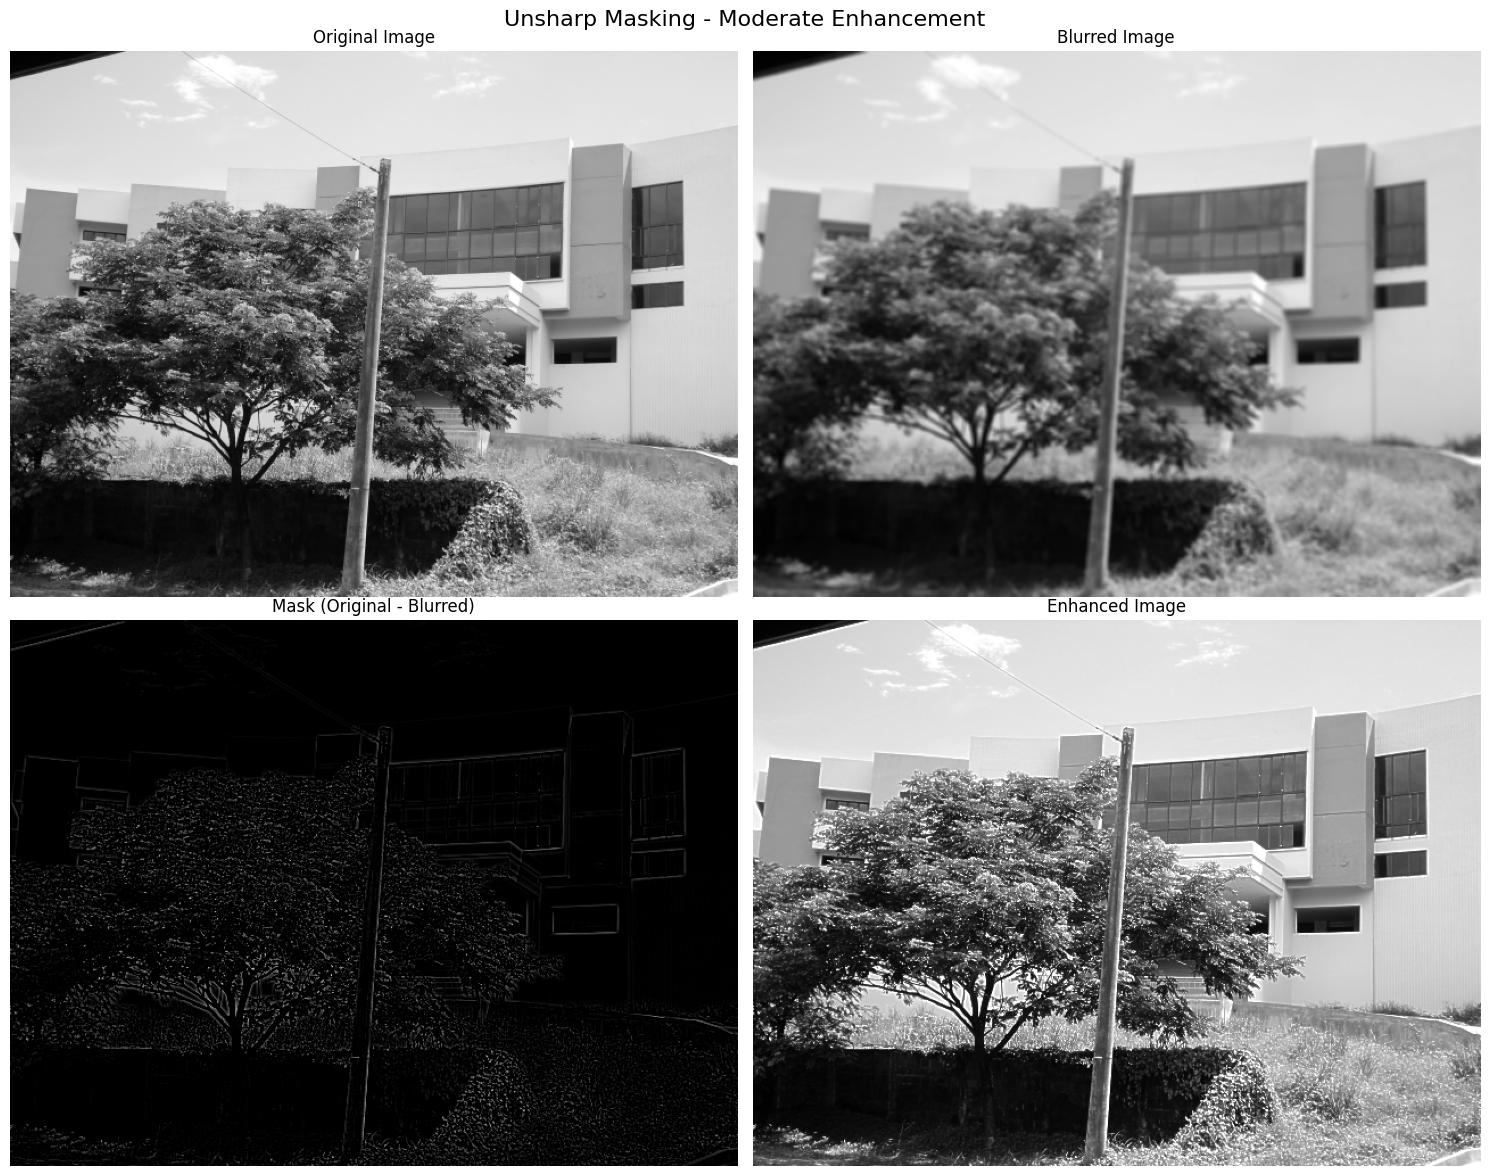

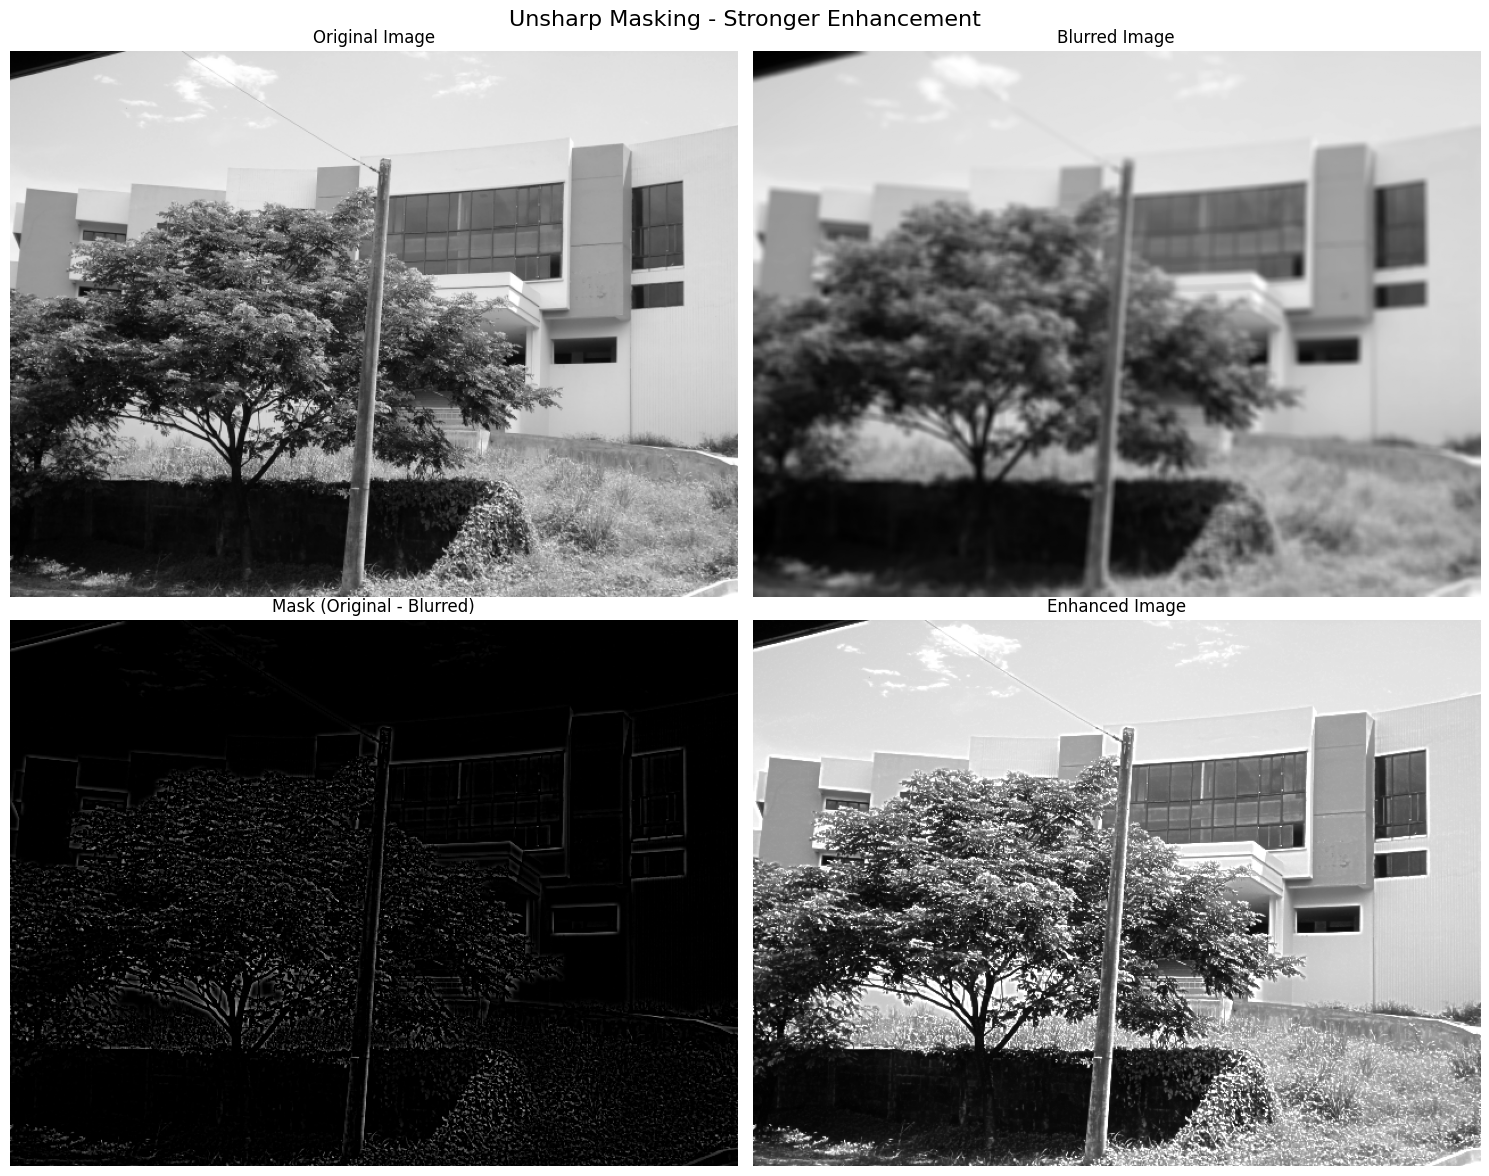

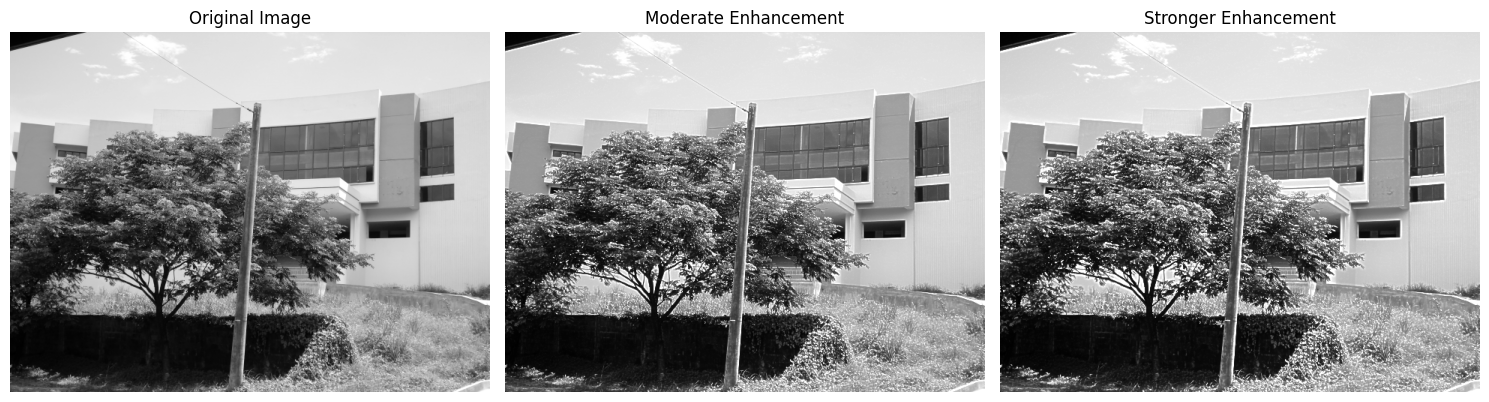

In [5]:
# Process the building.tif image
image = cv2.imread("images/building.tif", cv2.IMREAD_GRAYSCALE)

# Try different parameters
# Version 1: Moderate enhancement
enhanced1, blurred1, mask1 = unsharp_masking(image, 
                                            kernel_size=(5,5), 
                                            sigma=2.0, 
                                            amount=1.5)
display_all_steps(image, blurred1, mask1, enhanced1, 
                    "Unsharp Masking - Moderate Enhancement")

# Version 2: Stronger enhancement
enhanced2, blurred2, mask2 = unsharp_masking(image, 
                                            kernel_size=(7,7), 
                                            sigma=3.0, 
                                            amount=2.0)
display_all_steps(image, blurred2, mask2, enhanced2, 
                    "Unsharp Masking - Stronger Enhancement")

# Compare original vs both enhancements
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(enhanced1, cmap='gray')
plt.title('Moderate Enhancement')
plt.axis('off')

plt.subplot(133)
plt.imshow(enhanced2, cmap='gray')
plt.title('Stronger Enhancement')
plt.axis('off')

plt.tight_layout()
plt.show()

## Observations
Performing unsharp masking on the building image revealed more architectural details (window frames, brick textures, and building interior) by emphasizing high-frequency components. However, it also introduced two significant artifacts:

- Edge glow: Bright white outlines along high-contrast boundaries, especially in the portions where the building meets the sky
- Box-like artifacts: Box-like patterns found in the tree foliage and grass

These artifacts occur because unsharp masking enhances all high-frequency features without distinguishing between meaningful details and noise. The artifact severity increases with masking strength (i.e. larger mask), demonstrating the direct trade-off between detail enhancement and image quality preservation in spatial domain processing.